# PIMA Indians Diabetes

---

## Valencia Melita C - 0706022210007



## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])


## Load Dataset


In [3]:

df = pd.read_csv('https://raw.githubusercontent.com/valenciamelita/Dataset-DM/refs/heads/main/diabetes.csv')
df.head()
# mengeluarkan 5 data teratas dari dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:

df.info()
# melihat informasi dari dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dataset ini terdiri dari 768 entri yang berisi sembilan kolom, yang berfokus pada berbagai faktor yang terkait dengan diabetes. Kolom-kolom dalam dataset ini meliputi jumlah kehamilan (Pregnancies), kadar glukosa dalam darah (Glucose), tekanan darah (BloodPressure), ketebalan kulit (SkinThickness), kadar insulin (Insulin), indeks massa tubuh (BMI), fungsi pedigree diabetes (DiabetesPedigreeFunction), usia (Age), dan hasil (Outcome), di mana hasil menunjukkan apakah individu tersebut positif atau negatif terhadap diabetes. Semua kolom memiliki nilai non-null, yang menunjukkan tidak adanya data yang hilang. Tipe data terdiri dari tujuh kolom bertipe integer dan dua kolom bertipe float, dengan total penggunaan memori sekitar 54.1 KB. Dataset ini sering digunakan dalam analisis dan pengembangan model prediktif untuk diagnosis diabetes.

In [5]:
df.shape
# melihat jumlah baris dan kolom dari dataset. ada 768 baris dan 9 kolom

(768, 9)

In [6]:
df.describe()
# melihat statistik deskriptif dari dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Dataset ini terdiri dari 768 entri yang menganalisis berbagai faktor terkait diabetes, dengan sembilan variabel utama. Rata-rata jumlah kehamilan adalah 3.85, sementara kadar glukosa rata-rata mencapai 120.89 mg/dL dan tekanan darah rata-rata 69.11 mmHg. Ketebalan kulit rata-rata tercatat sebesar 20.54 mm, dengan kadar insulin rata-rata 79.80 IU/mL, menunjukkan variabilitas yang tinggi. Indeks massa tubuh (BMI) peserta rata-rata adalah 31.99, mengindikasikan sebagian besar berada dalam kategori overweight. Fungsi pedigree diabetes rata-rata adalah 0.47, dan usia rata-rata peserta adalah 33.24 tahun, dengan rentang usia dari 21 hingga 81 tahun. Dalam hal hasil, sekitar 34.9% peserta menunjukkan hasil positif terhadap diabetes. Data ini memberikan wawasan yang berguna untuk analisis lebih lanjut mengenai risiko diabetes.

In [7]:
# Null Handling, tidak ada baris yang null
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


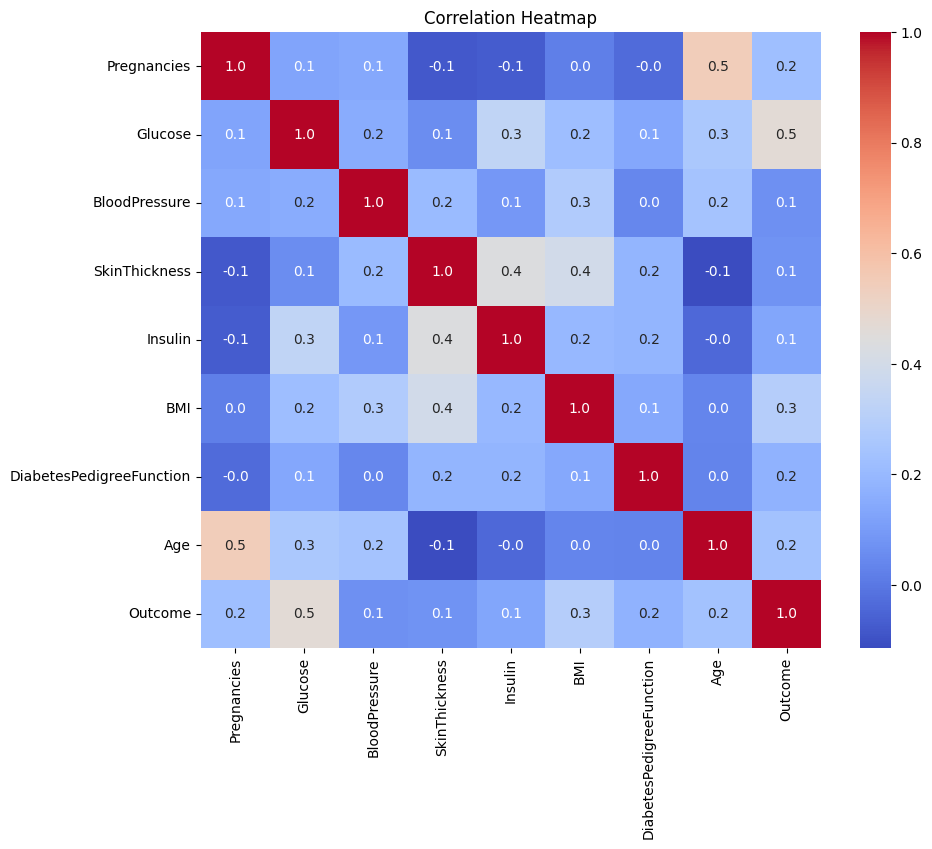

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

Peta korelasi ini menunjukkan hubungan antara berbagai variabel dalam dataset diabetes. Korelasi tertinggi ditemukan antara jumlah kehamilan (Pregnancies) dan usia (Age) dengan nilai 0.54, menunjukkan bahwa semakin banyak kehamilan, semakin tinggi usia individu. Selain itu, kadar glukosa (Glucose) memiliki korelasi positif yang signifikan dengan hasil (Outcome) (0.47), menandakan bahwa kadar glukosa yang lebih tinggi cenderung terkait dengan hasil positif terhadap diabetes. Insulin dan ketebalan kulit (SkinThickness) juga menunjukkan korelasi positif (0.44), yang menunjukkan bahwa kadar insulin yang lebih tinggi berhubungan dengan ketebalan kulit. Sebaliknya, BMI memiliki korelasi moderat dengan outcome (0.29) dan blood pressure (0.28). Korelasi negatif yang terendah terdapat antara skin thickness dan age (-0.11), yang menunjukkan sedikit penurunan ketebalan kulit seiring bertambahnya usia. Secara keseluruhan, peta korelasi ini memberikan wawasan penting tentang hubungan antara variabel-variabel dalam konteks diabetes.

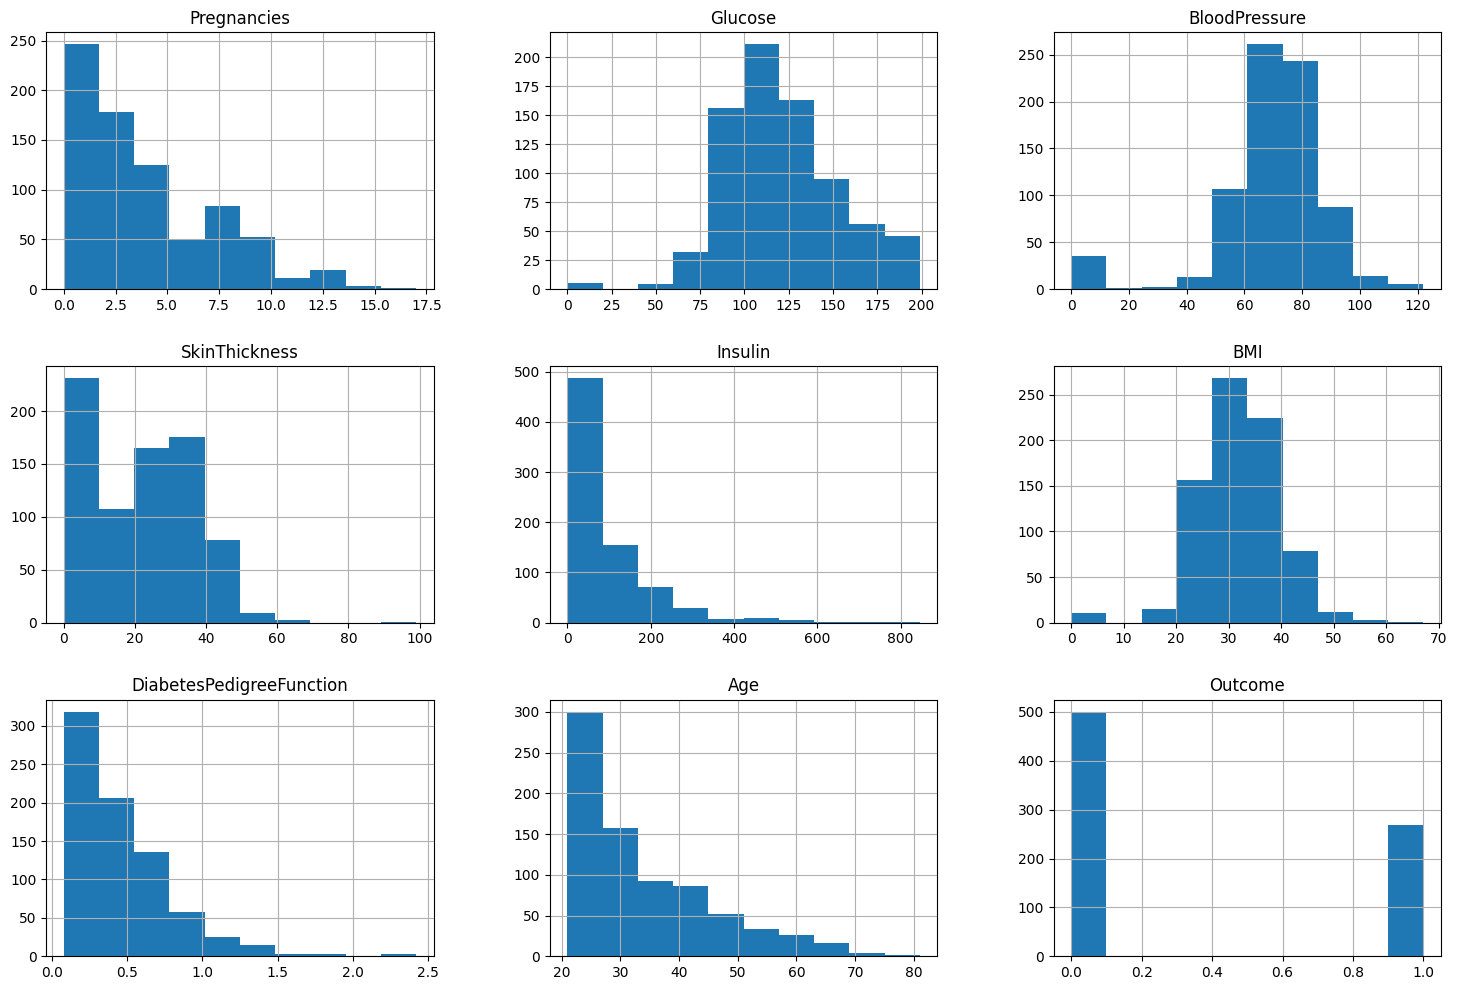

In [9]:
df.hist(figsize=(18,12))
plt.show()

Histogram dari beberapa variabel dalam dataset terkait diabetes. Setiap histogram menggambarkan distribusi masing-masing variabel. Pada grafik **Pregnancies**, terlihat bahwa sebagian besar individu memiliki jumlah kehamilan antara 0-5 kali. Distribusi **Glucose** menunjukkan pola yang mendekati normal, dengan kebanyakan nilai berada di kisaran 100-150. **Blood Pressure** (tekanan darah) berkisar antara 60-80 mmHg untuk mayoritas individu, sementara **Skin Thickness** dan **Insulin** memiliki banyak nilai nol, menunjukkan banyak data yang mungkin hilang atau tidak diukur. **BMI** (Indeks Massa Tubuh) sebagian besar berada pada rentang 25-35, mengindikasikan populasi dengan kelebihan berat badan. **Diabetes Pedigree Function** menunjukkan sebagian besar nilai rendah, yang berarti sebagian besar individu memiliki riwayat keluarga diabetes yang rendah. **Age** menunjukkan bahwa sebagian besar individu berada di usia 20-40 tahun. Terakhir, grafik **Outcome** menunjukkan bahwa sekitar 65% individu tidak menderita diabetes (nilai 0), sementara 35% lainnya didiagnosis dengan diabetes (nilai 1).

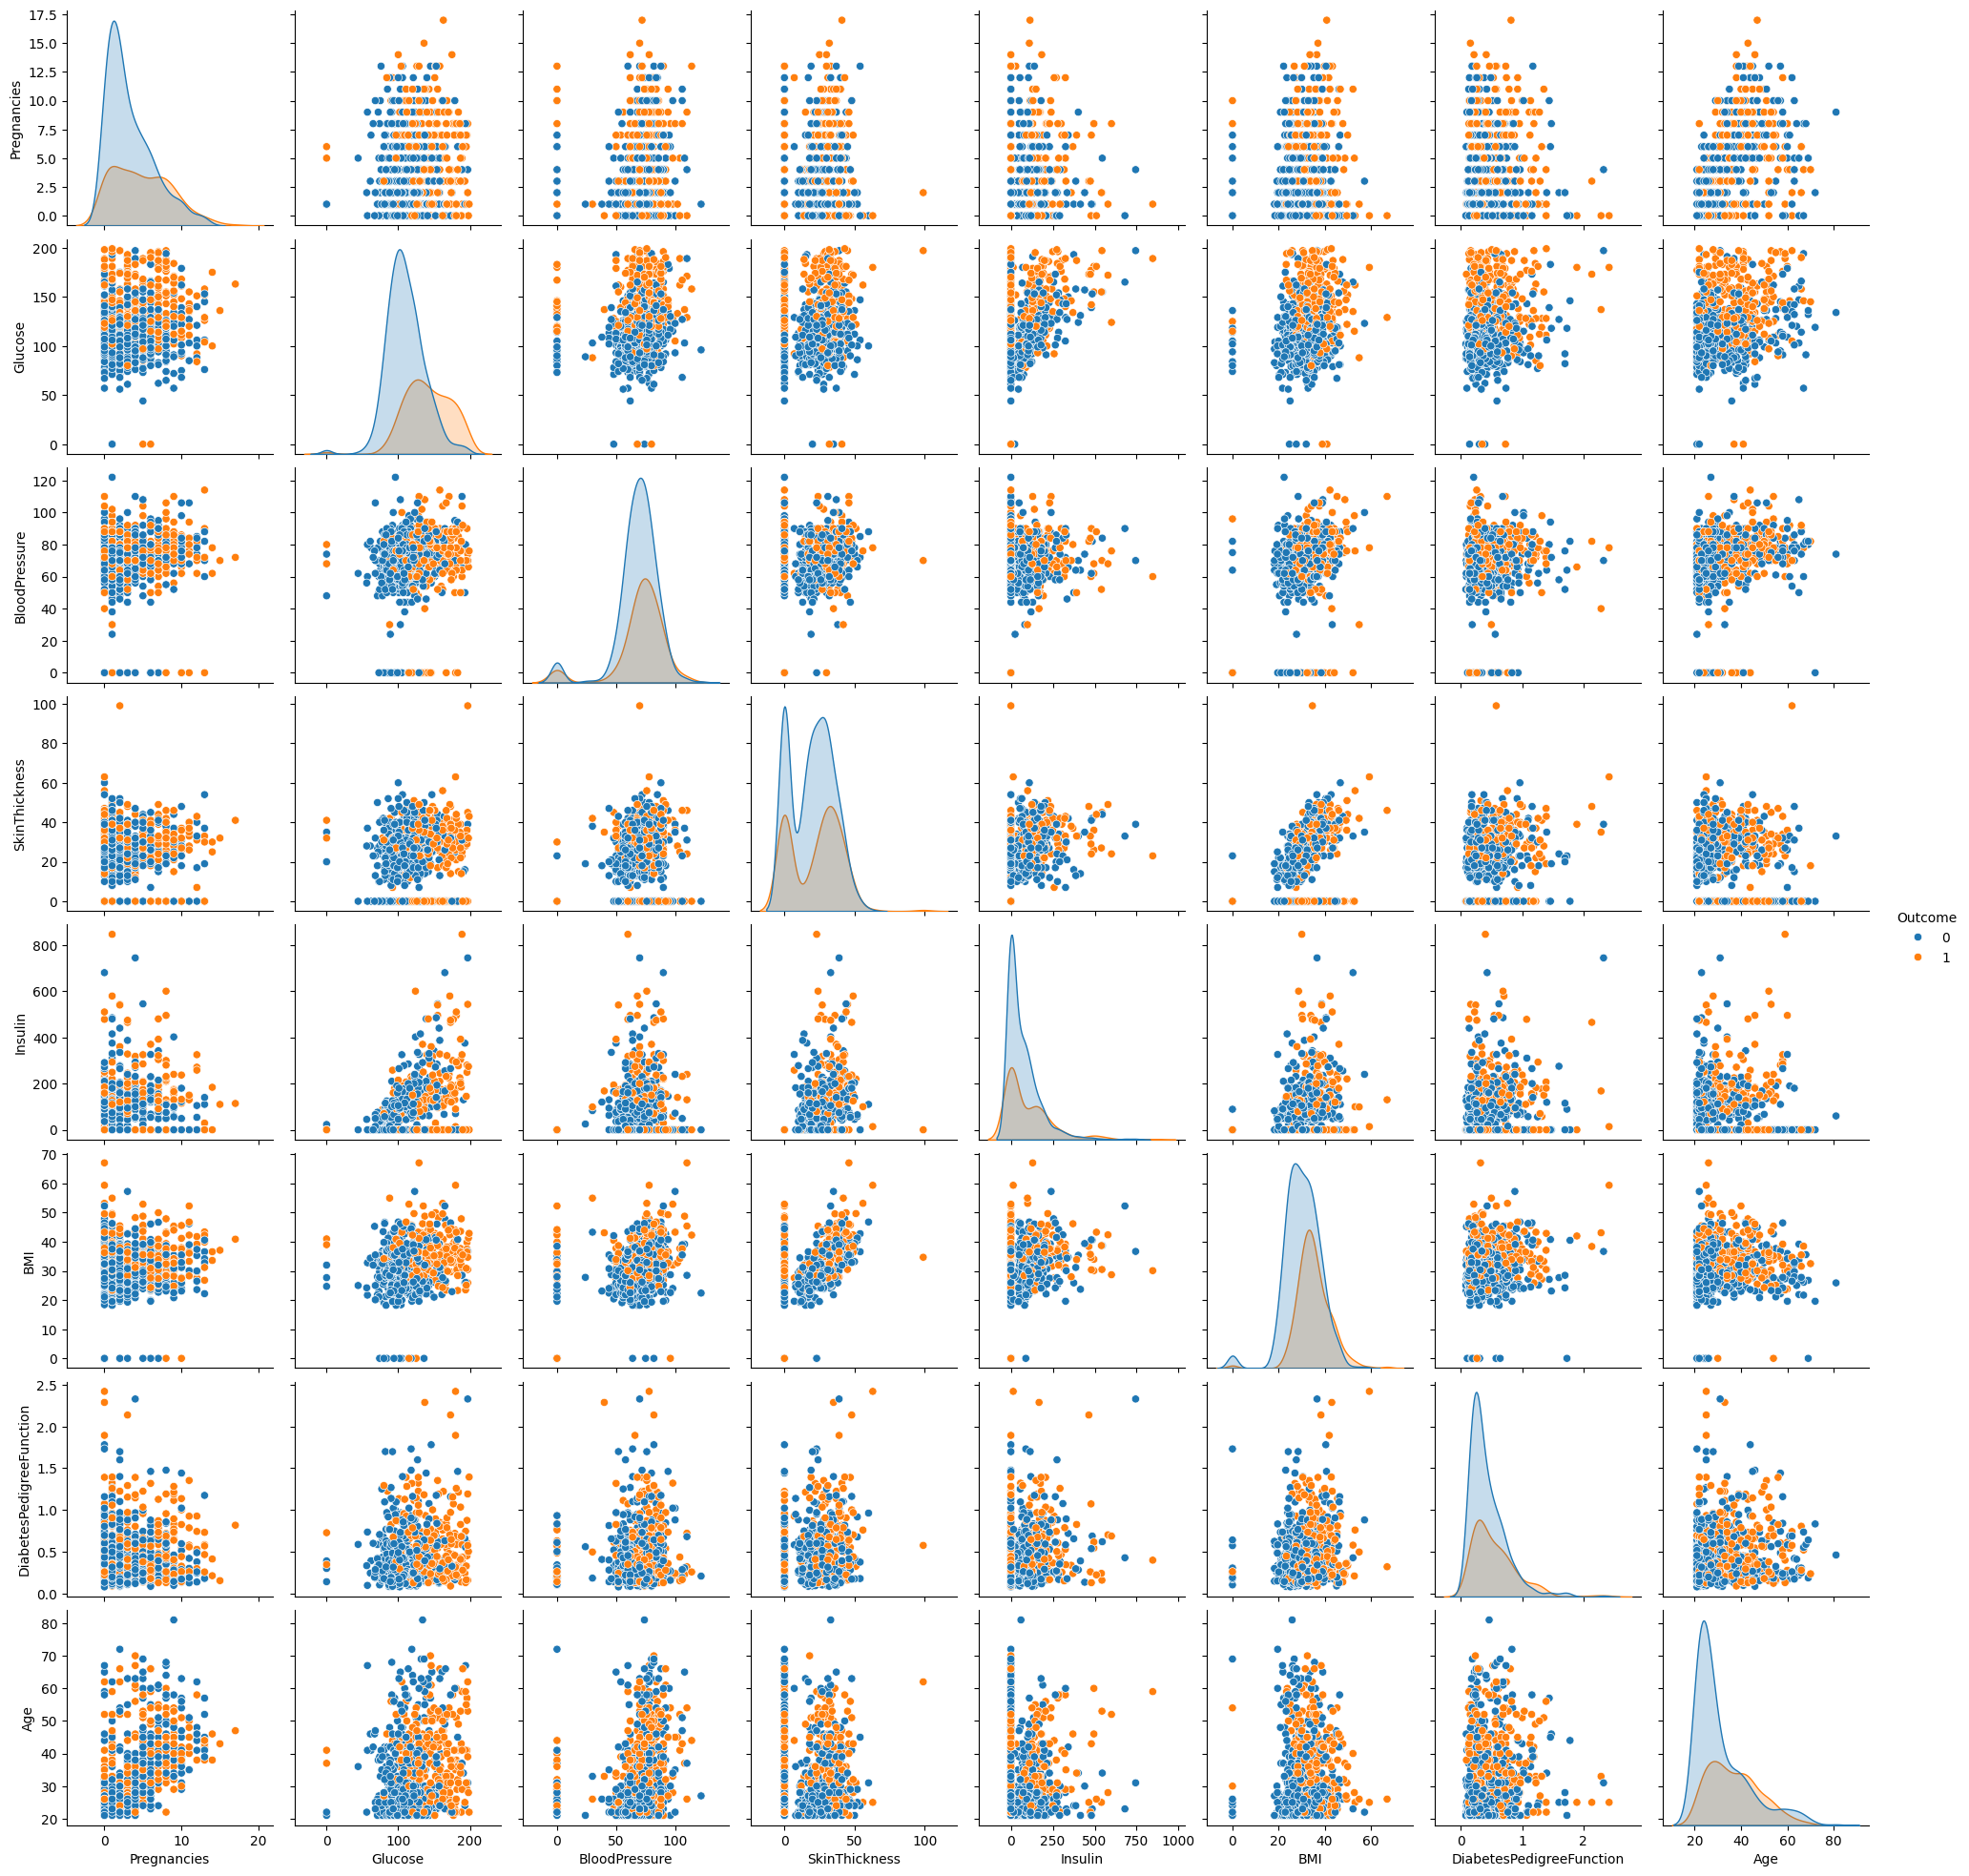

In [10]:
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()



Kode ini menghasilkan pairplot untuk dataset dengan menggunakan Seaborn. Pairplot ini menyajikan matriks scatter plot untuk setiap kombinasi variabel dalam dataset, di mana warna titik ditentukan oleh kolom *outcome*. Hal ini memungkinkan visualisasi hubungan antar variabel serta distribusi data berdasarkan hasil yang diperoleh.

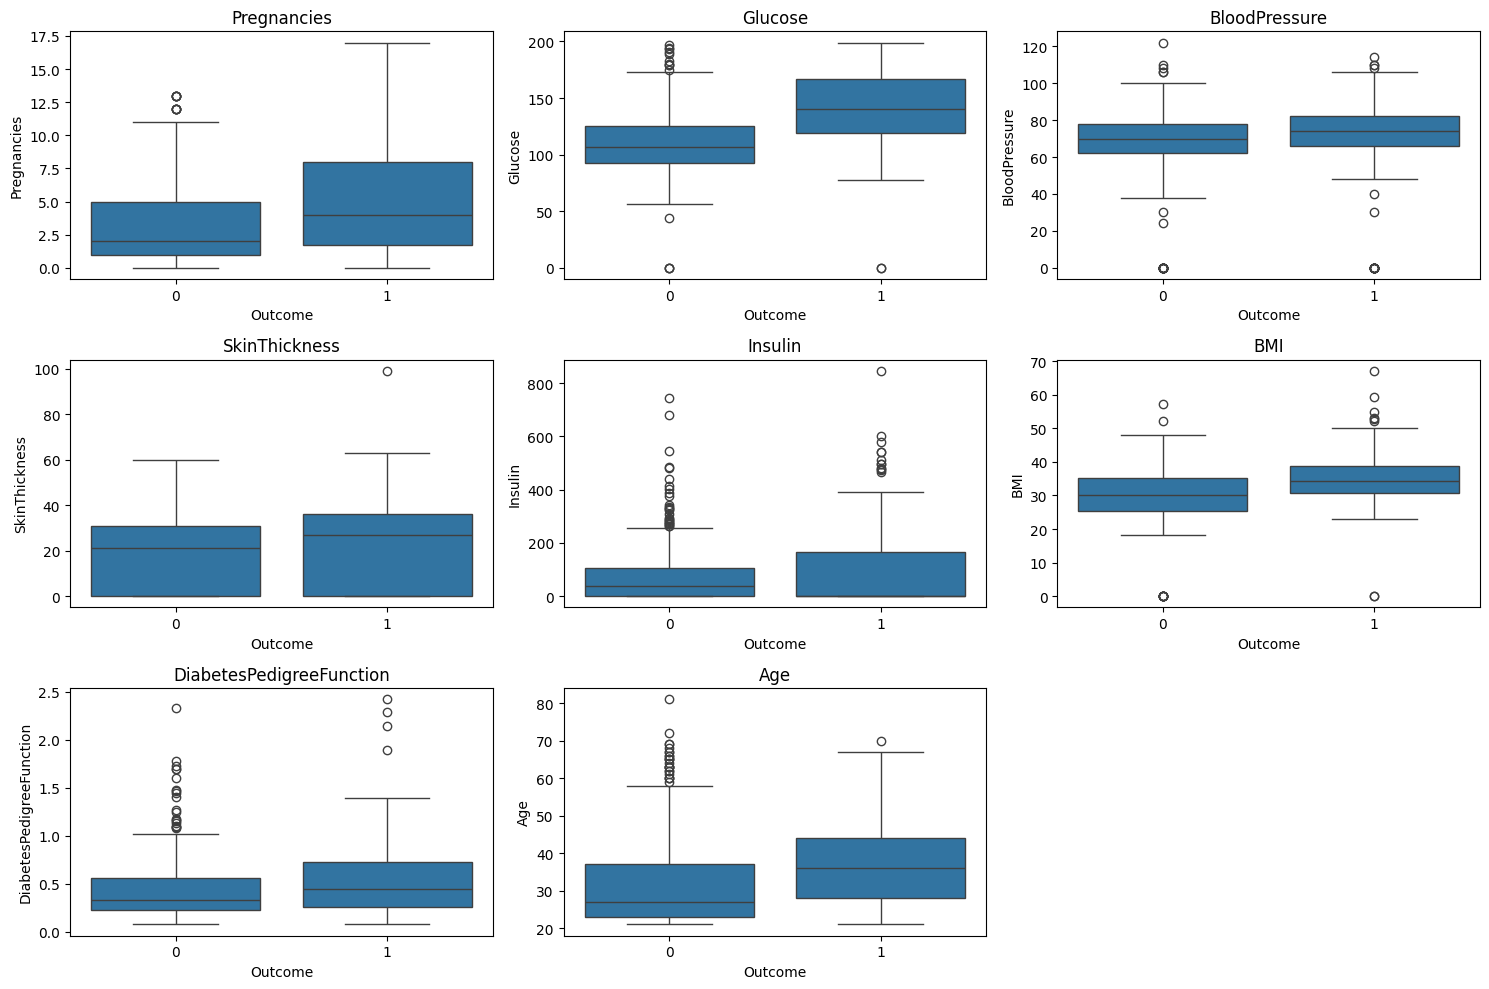

In [11]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):  # Exclude 'Outcome' column
  plt.subplot(3, 3, i + 1)
  sns.boxplot(x='Outcome', y=col, data=df)
  plt.title(col)

plt.tight_layout()
plt.show()

Individu dengan diabetes (Outcome = 1) memiliki nilai yang lebih tinggi pada beberapa variabel, seperti Glucose, BMI, dan Pregnancies, yang menunjukkan hubungan positif antara nilai variabel-variabel tersebut dan kemungkinan menderita diabetes. Blood Pressure dan Skin Thickness terlihat tidak menunjukkan perbedaan yang signifikan antara kedua kelompok, sementara Insulin memiliki penyebaran data yang luas dengan banyak outliers di kedua kategori. Diabetes Pedigree Function dan Age juga memiliki perbedaan yang moderat, di mana orang dengan diabetes cenderung memiliki nilai yang lebih tinggi. Dari boxplot ini, dapat diidentifikasi variabel mana saja yang mungkin lebih relevan dalam menentukan Outcome terkait diabetes.

## Decision Tree Entropy

In [12]:
# X adalah variabel independen (Semua selain kolom Outcome), Y adalah variabel dependen yang harus diprediksi (kolom Outcome)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [13]:
# Memecah data untuk testing dan juga training. Untuk testing sebanyak 20% dan untuk training sebanyak 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Memperlihatkan jumlah baris dan kolom yang ada dalam test dan train
# 614 baris untuk training dan 154 baris untuk testing
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [15]:
#Criterion Entropy

dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=4)
dt_entropy.fit(X_train, y_train)

# Membuat model decision tree dengan kriteria yang didasarkan pada entropy untuk menghitung impurity, random state digunakan untuk hasil nilai acak yang sama setiap mengambil data
# Melatih model decision tree menggunakan x-train dan y-train

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [16]:
y_pred_entropy = dt_entropy.predict(X_test)
# Variabel y_pred_entropy akan berisi hasil prediksi dari data uji X_test, yang dapat digunakan untuk membandingkan hasil prediksi dengan label asli (y_test) dan menilai kinerja model.

In [17]:
#c
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Model accuracy score with criterion entropy:", accuracy_entropy)
# Mengukur seberapa akurat sebuah model, Dengan akurasi model sebesar 0.7142 (atau sekitar 71.42%) menggunakan kriteria entropi, kita dapat menyimpulkan bahwa model ini memiliki kinerja yang moderat, menunjukkan kemampuan untuk mengklasifikasikan data dengan cukup baik, namun masih terdapat ruang untuk perbaikan.
# Jika akurasi pada data pelatihan jauh lebih tinggi dibandingkan dengan data uji, hal ini dapat mengindikasikan adanya overfitting, di mana model tidak mampu generalisasi dengan baik pada data baru.

Model accuracy score with criterion entropy: 0.7142857142857143


In [18]:
train_score = dt_entropy.score(X_train, y_train) # Menghitung akurasi pada data train. Nilai ini menunjukkan seberapa baik model dapat memprediksi label dari data yang sama digunakan saat pelatihan.
test_score = dt_entropy.score(X_test, y_test) # Menghitung akurasi model pada data uji. Ini memberikan gambaran tentang seberapa baik model dapat memprediksi label dari data yang tidak terlihat sebelumnya.
print("Training set score:", train_score) # Menampilkan skor akurasi pada data pelatihan.
print("Test set score:", test_score)

# Hasil akurasi Decision Tree menunjukkan bahwa model memiliki training set score sebesar 0.7915 dan test set score sebesar 0.7143. Perbedaan skor yang relatif kecil ini menunjukkan bahwa model tidak terlalu overfitting,
# tetapi masih ada sedikit penurunan performa ketika diuji dengan data baru (test set). Meskipun model tampaknya mampu menangkap pola dari data pelatihan dengan cukup baik, performanya pada data uji sedikit lebih rendah,
# yang bisa menunjukkan bahwa model masih bisa ditingkatkan, misalnya dengan melakukan tuning parameter atau menggunakan teknik seperti pruning untuk mencegah kompleksitas berlebih.


Training set score: 0.7915309446254072
Test set score: 0.7142857142857143


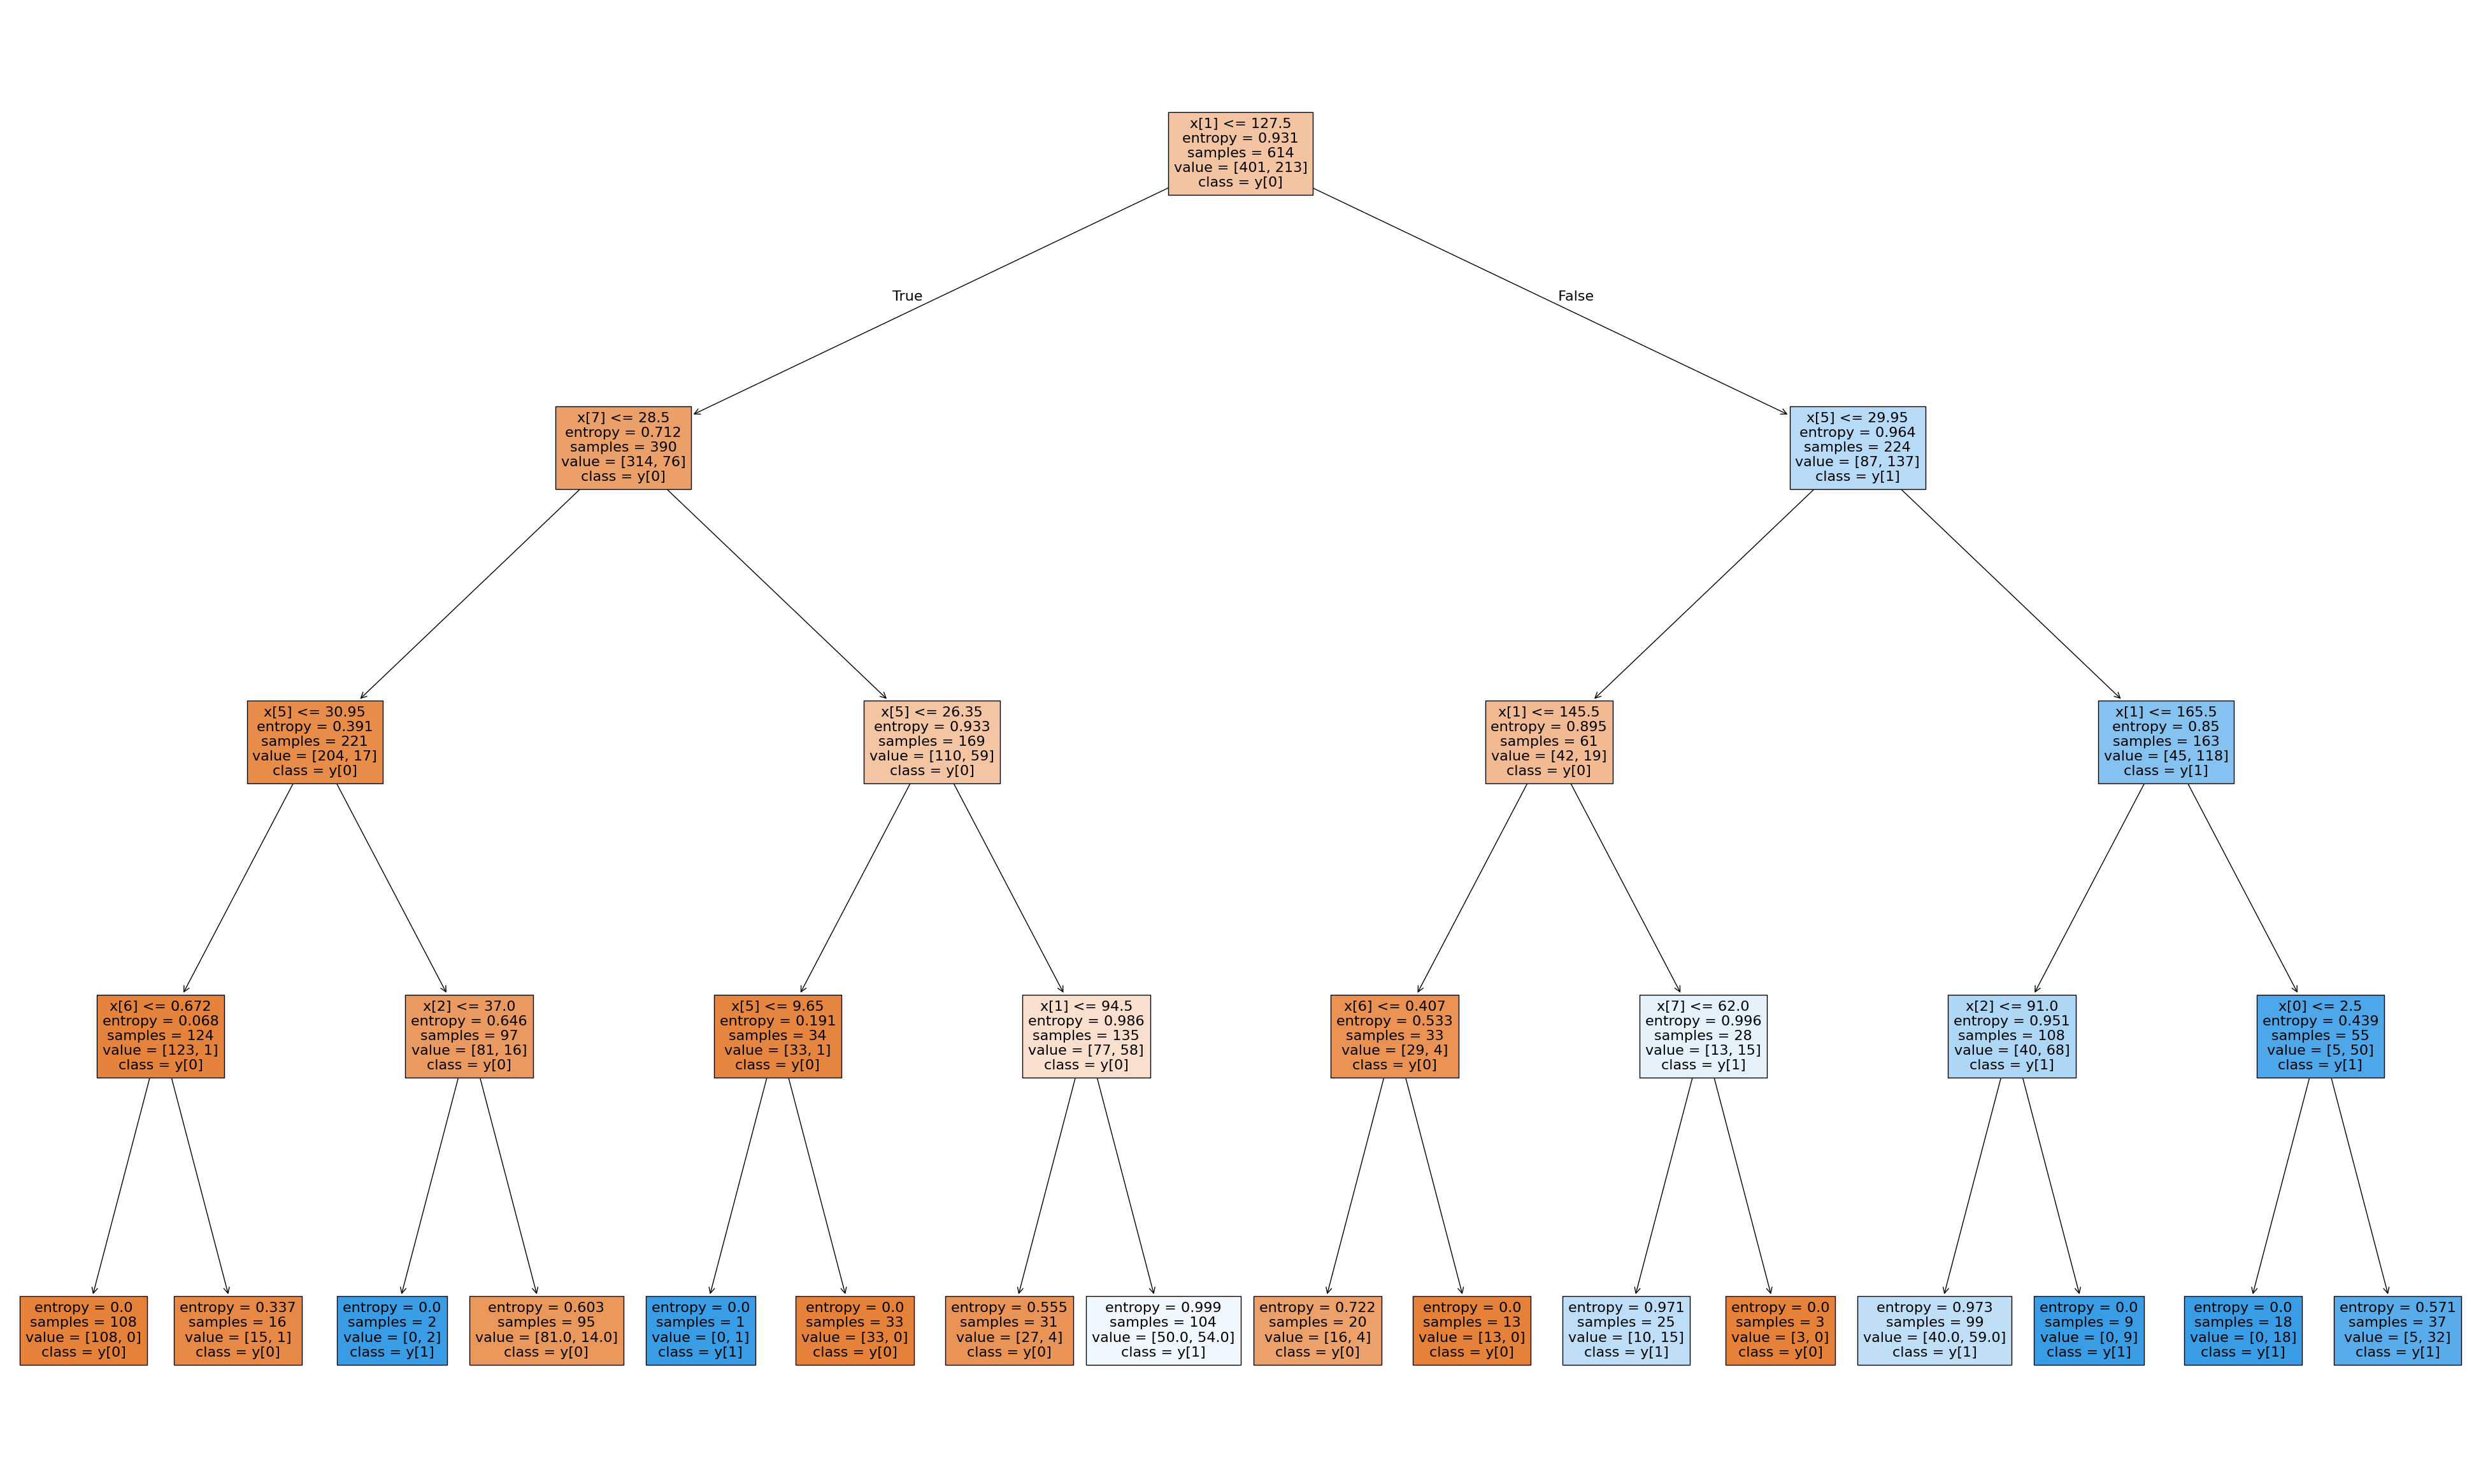

In [34]:
plt.figure(figsize=(50, 30))
tree.plot_tree(dt_entropy, filled=True, class_names=True)
plt.show()

# Kode ini untuk membuat klasifikasi decision tree

In [20]:
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
print("Confusion matrix with criterion entropy:")
print(cm_entropy)

Confusion matrix with criterion entropy:
[[65 34]
 [10 45]]


In [42]:
print_confusion_matrix(y_test, y_pred_entropy)

True positive =  65
False positive =  34
False negative =  10
True negative =  45


TP : True Positives : 65 : memprediksi 65 orang diabetes dan memang diabetes.

TN : True Negative : 45 : memprediksi 45 orang tidak diabetes dan sebenarnya tidak diabetes.

FP : False Positives : 34 : memprediksi 34 orang diabetes tapi sebenarnya tidak diabetes.

FN : False Negatives : 10 : memprediksi 10 orang tidak diabetes tapi sebenarnya diabetes.

In [21]:
cr_entropy = classification_report(y_test, y_pred_entropy)
print("Classification report with criterion entropy:\n", cr_entropy)

Classification report with criterion entropy:
               precision    recall  f1-score   support

           0       0.87      0.66      0.75        99
           1       0.57      0.82      0.67        55

    accuracy                           0.71       154
   macro avg       0.72      0.74      0.71       154
weighted avg       0.76      0.71      0.72       154



Laporan klasifikasi di atas menunjukkan performa model **Decision Tree** dengan kriteria **entropy** pada dua kelas: 0 (tidak diabetes) dan 1 (diabetes). Untuk kelas 0, model memiliki **precision** sebesar 0.87, yang berarti dari semua prediksi kelas 0, 87% benar. Namun, **recall** hanya 0.66, yang menunjukkan bahwa dari semua individu yang benar-benar tidak memiliki diabetes, hanya 66% yang berhasil diidentifikasi dengan benar. Sebaliknya, untuk kelas 1, **precision** lebih rendah di angka 0.57, tetapi **recall** cukup tinggi di 0.82, menunjukkan bahwa 82% dari individu yang benar-benar memiliki diabetes berhasil diidentifikasi oleh model. **Akurasi total** model adalah 0.71, yang berarti model secara keseluruhan mengklasifikasikan 71% data uji dengan benar. **Macro average** menunjukkan performa rata-rata untuk kedua kelas, dengan **f1-score** sekitar 0.71, sedangkan **weighted average** menunjukkan performa rata-rata dengan memperhitungkan distribusi kelas, dengan f1-score di 0.72. Secara keseluruhan, model ini cenderung lebih baik dalam mengidentifikasi individu yang memiliki diabetes (kelas 1) dibandingkan yang tidak (kelas 0), meskipun ada ruang untuk peningkatan pada precision kelas 1 dan recall kelas 0.

## Naive Bayes

In [23]:
nb = GaussianNB()
nb.fit(X_train, y_train)

# Membuat instance dari GaussianNB untuk naive bayes.
# Melatih model dengan data yang dilatih dan di test

GaussianNB()

In [24]:
y_pred_nb = nb.predict(X_test)
# Menentukan label spesies penguin berdasarkan fitur yang ada di data pengujian.

In [43]:
print("Confusion Matrix using Gaussian Naive Bayes:")
print(confusion_matrix(y_test, y_pred_nb))


Confusion Matrix using Gaussian Naive Bayes:
[[79 20]
 [16 39]]


In [40]:
print_confusion_matrix(y_test, y_pred_nb)

True positive =  79
False positive =  20
False negative =  16
True negative =  39


TP : True Positives : 79 : memprediksi 79 orang diabetes dan memang diabetes.

TN : True Negative : 39 : memprediksi 39 orang tidak diabetes dan sebenarnya tidak diabetes.

FP : False Positives : 20 : memprediksi 20 orang diabetes tapi sebenarnya tidak diabetes.

FN : False Negatives : 16 : memprediksi 16 orang tidak diabetes tapi sebenarnya diabetes.

In [44]:
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_nb))

# Akurasi sebesar 0.766 atau sekitar 76,6% untuk model Naive Bayes menunjukkan bahwa model ini mampu memprediksi dengan benar
# sekitar 76,6% dari total data uji. Meskipun ini adalah hasil yang cukup baik, model masih dapat ditingkatkan karena sekitar 23,4% prediksinya masih salah.

Accuracy Score:
0.7662337662337663


In [27]:
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



Performa model dengan **akurasi keseluruhan 77%** pada dataset. Untuk kelas 0 (tidak diabetes), model memiliki **precision** sebesar 0.83, yang berarti dari semua prediksi kelas 0, 83% akurat, dengan **recall** 0.80, artinya 80% dari semua kasus sebenarnya kelas 0 berhasil diidentifikasi. Untuk kelas 1 (diabetes), **precision** lebih rendah di angka 0.66, menunjukkan 66% dari prediksi kelas 1 benar, namun **recall** cukup baik di 0.71, artinya model mengenali 71% dari kasus diabetes dengan benar. **F1-score** keseluruhan adalah 0.77, yang menunjukkan keseimbangan antara precision dan recall. Secara keseluruhan, model ini bekerja lebih baik dalam mengidentifikasi individu yang tidak memiliki diabetes dibandingkan dengan mereka yang memiliki diabetes, meskipun performa untuk kelas 1 masih cukup memadai.

## KNN

In [29]:

# Make the classification model
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [30]:
y_pred_knn = classifier.predict(X_test)
# Displaying the classification report
report_knn = classification_report(y_test, y_pred_knn, zero_division=1)
print('\nClassification Report using K Nearest Neighbour:')
print(report_knn)

# Identifying TP, TN, FP, and FN
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix using K Nearest Neighbour\n", cm_knn)

# Display the accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nAccuracy Score using K Nearest Neighbour: ", accuracy_knn)


Classification Report using K Nearest Neighbour:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154

Confusion Matrix using K Nearest Neighbour
 [[70 29]
 [23 32]]

Accuracy Score using K Nearest Neighbour:  0.6623376623376623


Hasil dari **K Nearest Neighbour (KNN)** menunjukkan bahwa model ini mencapai **akurasi 66%** pada dataset uji. Dari **classification report**, untuk kelas 0 (tidak diabetes), model memiliki **precision** sebesar 0.75, yang berarti 75% dari prediksi untuk kelas 0 benar, dengan **recall** 0.71, artinya model berhasil mengidentifikasi 71% dari kasus sebenarnya yang tidak memiliki diabetes. Untuk kelas 1 (diabetes), **precision** lebih rendah di angka 0.52, dengan **recall** 0.58, menunjukkan model sedikit kesulitan dalam mengenali individu dengan diabetes.

Dari **confusion matrix**, model memprediksi 70 individu dengan benar sebagai non-diabetes (True Negatives) dan 32 individu dengan benar sebagai diabetes (True Positives). Namun, 23 individu yang memiliki diabetes salah diklasifikasikan sebagai non-diabetes (False Negatives), dan 29 individu yang tidak memiliki diabetes diklasifikasikan salah sebagai diabetes (False Positives).

Secara keseluruhan, performa model KNN ini cukup baik, meskipun akurasinya sedang, dengan hasil yang lebih kuat untuk mengidentifikasi kasus non-diabetes dibandingkan dengan kasus diabetes.